In [36]:
# !pip install kiwipiepy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install ipython-autotime
# !pip install tqdm

time: 182 µs (started: 2024-04-04 12:29:02 +09:00)


# ■ 모듈 선언

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from kiwipiepy import Kiwi
from collections import Counter
import tqdm

time: 283 µs (started: 2024-04-04 12:29:02 +09:00)


In [38]:
# 셀 별로 러닝타임 측정
%load_ext autotime

# process 진행상황 확인
tqdm.tqdm.pandas()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.13 ms (started: 2024-04-04 12:29:02 +09:00)


# ■ 형태소 분석 및 토큰화

In [39]:
# Kiwi 선언
kiwi = Kiwi()

time: 704 ms (started: 2024-04-04 12:29:02 +09:00)


In [40]:
# 진단기준 선언

mental_disorder = {
    'obsessive_compulsive_disorder': [
        '재발성 및 지속적인 생각, 충동 또는 이미지가 방해 기간 동안 침입적이고 원치 않는 것으로 경험되며, 대부분의 개인에게는 뚜렷한 불안이나 고통을 유발합니다.',
        '개인은 이러한 생각, 충동, 또는 이미지를 무시하거나 억제하려고 하거나, 어떤 다른 생각이나 행동(즉, 강박 행동을 수행함)으로 중화하려고 시도합니다.',
        '강박 증상에 대응하거나 엄격하게 적용해야 하는 규칙에 따라 수행하게 되는 반복적인 행동(예: 손 씻기, 정리, 확인) 또는 정신적 행위(예: 기도, 계산, 조용히 단어 반복)입니다.',
        '이러한 행동이나 정신적 행위는 불안이나 고통을 예방하거나 감소시키거나, 어떤 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 이 행동이나 정신적 행위는 그것들을 중화하거나 예방하는 것과 현실적으로 연결되지 않거나 분명히 과도합니다.',
        '강박 증상 또는 강박 행동이 시간을 많이 소모합니다(예: 하루에 1시간 이상 소요) 또는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발합니다.',
        '방해적이고 원치 않는 것으로 경험되며 대부분의 개인에게 현저한 불안이나 고통을 유발하는 반복적이고 지속적인 생각, 충동 또는 이미지',
        '그러한 생각, 충동 또는 이미지를 무시하거나 억제하려고 시도하거나 다른 생각이나 행동으로 이를 중화하려고 시도합니다',
        '강박관념에 대한 반응으로 또는 엄격하게 적용해야 하는 규칙에 따라 수행해야 한다고 느끼는 반복적 행동 또는 정신적 활동',
        '행동이나 정신적 행위가 불안이나 괴로움을 예방 또는 감소시키거나 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 현실적으로 연결되지 않거나 과도합니다',
        '강박사고나 강박행동은 시간이 많이 걸리거나(예: 하루에 1시간 이상 소요) 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다',
        '강박 증상은 물질의 생리적 효과나 다른 의학적 상태로 인한 것이 아닙니다',
        '장애가 다른 정신 장애의 증상으로 더 잘 설명되지 않습니다'
    ],
    'posttraumatic_stress_disorder': [
        '실제 또는 위협적인 죽음, 심각한 상해, 또는 성폭력에 노출되는 것으로, 다음 중 하나(또는 그 이상)의 방식으로 발생합니다: 직접 경험, 다른 사람에게 발생한 사건을 직접 목격, 친한 가족 구성원 또는 친한 친구에게 발생한 외상 사건을 알게 됨, 외상 사건의 불쾌한 세부 사항에 반복적으로 또는 극단적으로 노출됨.',
        '외상 사건과 관련된 하나(또는 그 이상)의 침입 증상이 외상 사건 발생 후 나타남.',
        '외상 사건과 관련된 자극에 대한 지속적인 회피.',
        '외상 사건과 관련된 인지 및 기분의 부정적 변화.',
        '외상 사건과 관련된 각성 및 반응성의 뚜렷한 변화.',
        '장애의 지속 기간이 1개월 이상임.',
        '장애가 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발함.',
        '실제 또는 위협적인 죽음, 심각한 부상 또는 성폭력에 노출됩니다',
        '외상적 사건에 대한 반복적이고 비자발적이며 침해적인 고통스러운 기억',
        '꿈의 내용 및/또는 영향이 외상적 사건과 관련되어 있는 반복되는 고통스러운 꿈',
        '개인이 외상성 사건이 재발하는 것처럼 느끼거나 행동하는 해리 반응',
        '외상적 사건의 측면을 상징하는 내부 또는 외부 단서에 대한 강렬하거나 장기간의 심리적 고통 또는 생리적 반응',
        '외상성 사건과 관련된 자극을 지속적으로 회피',
        '외상성 사건과 관련된 인지 및 기분의 부정적 변화',
        '외상성 사건과 관련된 각성 및 반응성의 현저한 변화',
        '장애 기간이 1개월을 초과합니다',
        '장애는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다',
        '장애는 물질의 생리적 효과나 다른 의학적 상태로 인한 것이 아닙니다'
        ],
    'paranoid_personality_disorder': [
        '타인에 대한 만연한 불신과 의심이 있어서, 그들의 동기가 악의적으로 해석되며, 성인 초기부터 시작하여 다양한 상황에서 나타남.',
        '충분한 근거 없이 타인이 자신을 이용하거나 해치거나 속이고 있다고 의심함.',
        '친구나 동료의 충성심이나 신뢰성에 대해 근거 없는 의심에 사로잡혀 있음.',
        '정보가 악의적으로 사용될 것이라는 근거 없는 두려움 때문에 다른 사람에게 신뢰하기를 꺼림.',
        '해가 없는 말이나 사건에 숨겨진 비하적이거나 위협적인 의미를 읽어냄.',
        '지속적으로 원한을 품음 (즉, 모욕, 상해, 또는 경시에 대해 용서하지 않음).',
        '타인에게는 분명하지 않은 자신의 성격이나 명성에 대한 공격을 인지하며, 이에 대해 빠르게 화를 내거나 반격함.',
        '배우자나 성적 파트너의 충실성에 대해 근거 없는 반복적인 의심을 함.',
        '조현병, 양극성 장애 또는 우울 장애의 정신병적 특징, 또는 다른 정신병적 장애의 과정 중에만 발생하지 않으며, 다른 의학적 상태의 생리적 효과에 기인하는 것이 아님.',
        '타인에 대한 광범위한 불신과 의심이 초기 성인기에 시작되어 다양한 상황에서 나타납니다',
        '충분한 근거 없이 다른 사람들이 자신을 착취하거나 해를 끼치거나 속이고 있다고 의심합니다',
        '친구나 동료의 충성심이나 신뢰성에 대한 부당한 의심에 사로잡혀 있습니다',
        '정보가 자신에게 불리하게 사용될 것이라는 부당한 두려움 때문에 다른 사람에게 비밀을 털어놓는 것을 꺼립니다',
        '온화한 발언이나 사건에 숨겨진 비하하거나 위협적인 의미를 읽어냅니다',
        '지속적으로 원한을 풉니다(즉, 모욕, 부상 또는 경멸을 용서하지 않습니다)',
        '다른 사람에게는 드러나지 않는 자신의 성격이나 평판에 대한 공격을 인지하고 신속하게 화를 내거나 반격합니다',
        '정당한 사유 없이 배우자나 성 파트너의 정절에 대해 반복적으로 의심을 풉니다',
        '정신분열증, 양극성 장애, 정신병적 특징을 지닌 우울 장애, 또는 다른 정신병적 장애가 진행되는 동안에만 발생하지 않으며, 다른 의학적 상태의 생리적 효과로 인한 것이 아닙니다'
        ],
    'ADHD' : ['세부 사항에 세심한 주의를 기울이지 못하거나 학업, 직장 또는 기타 활동 중에 부주의한 실수를 저지른다(세부 사항을 간과하거나 놓치거나 작업이 부정확함)',
                '과제나 놀이 활동(강의, 대화, 독서)에서 집중력을 유지하는 데 어려움을 겪는 경우가 많다',
                '직접적으로 말을 하면 듣지 않는 것 같다(명백한 방해 요소가 없어도 마음이 다른 곳에 있는 것처럼 보임).',
                '지시를 따르지 않고 공부, 집안일 또는 여러 활동에서 의무를 마치지 못함(작업을 시작하지만 쉽게 집중력을 잃고 쉽게 딴 길로 빠짐)'
                '업무와 활동을 체계화하는 데 어려움을 겪음(순차적인 업무를 관리하는 데 어려움, 재료와 소지품을 정리하는 데 어려움, 지저분하고 체계적이지 않은 작업, 시간 관리가 부족함, 마감일을 지키지 못함)',
                '지속적인 정신적 노력이 필요한 작업(학업이나 숙제)을 피하거나 싫어하거나 참여를 꺼림',
                '과제나 활동에 필요한 물건(연필, 책, 지갑, 열쇠, 안경, 휴대폰)을 자주 잃어버림',
                '외부 자극에 의해 쉽게 주의가 산만해짐(관련 없는 생각 포함)',
                '일상 활동(집안일, 심부름, 전화 응답, 약속 준수)에서 종종 잊어버림',
                '손이나 발을 안절부절 못하거나 두드리거나 자리에서 몸부림침',
                '앉은 상태를 유지해야 하는 상황에서 자리를 떠남',
                '부적절한 상황에서 뛰어다니거나 기어오르는 경우가 많음',
                '조용히 놀거나 여가 활동에 참여할 수 없는 경우가 많음',
                '오랜 시간 동안 가만히 있을 수 없거나 불편해함',
                '지나치게 말을 많이 하는 경우가 많음',
                '질문이 완료되기 전에 성급하게 대답함(대화에서 차례를 기다릴 수 없음)',
                '자신의 차례를 기다리는 데 어려움을 겪음',
                '다른 사람을 방해하거나 침해함(활동에 끼어들기, 허락을 구하거나 받지 않고 다른 사람의 물건을 사용함)',
                '종종 세부 사항에 충분히 주의를 기울이지 않거나 학교 과제, 직장에서 또는 기타 활동 중에 부주의한 실수를 함(세부 사항을 간과하거나 놓치며, 작업이 부정확함)',
                '종종 작업이나 놀이 활동에서 주의를 지속하는 데 어려움을 겪음 (강의, 대화 또는 긴 독서 중에 집중을 유지하는 데 어려움이 있음)',
                '주의가 다른 곳에 있는 것처럼 보이며, 뚜렷한 방해 요소가 없는 경우에도 직접 말을 걸었을 때 종종 듣고 있는 것처럼 보이지 않음',
                '종종 지시 사항을 따르지 않고 학교 과제, 집안일 또는 직장에서의 임무를 마치지 못함 (작업을 시작하지만 빠르게 집중력을 잃고 쉽게 다른 일에 정신이 팔림)'
                '종종 작업과 활동을 조직하는 데 어려움을 겪음 (순차적 작업 관리에 어려움; 물건과 소지품을 정돈하는 데 어려움; 지저분하고 무질서한 작업; 시간 관리가 부족; 마감기한을 지키지 못함)',
                '종종 정신적 노력을 요구하는 작업을 피하거나 싫어함 (학교 과제나 숙제; 성인의 경우 보고서 작성, 양식 작성, 긴 문서 검토 등)',
                '종종 작업이나 활동에 필요한 물건을 자주 잃음 (학교 물품, 연필, 책, 도구, 지갑, 열쇠, 서류, 안경, 휴대 전화)',
                '종종 외부 자극에 쉽게 주의가 산만함 (성인의 경우, 관련 없는 생각을 포함할 수 있음)',
                '일상 활동에서 종종 건망증이 있음 (집안일, 심부름; 성인의 경우 전화 걸기, 청구서 지불, 약속 지키기 등)',
                '종종 손이나 발을 더듬거나 발로 땅을 차거나 자리에서 움직임',
                '앉아 있어야 하는 상황에서 자리를 자주 떠남 (교실, 사무실 또는 다른 직장, 또는 자리에 머물러야 하는 다른 상황에서 자리를 떠남)',
                '부적절한 상황에서 자주 뛰어다니거나 기어오름 (청소년이나 성인의 경우, 불안정함으로 제한될 수 있음.)',
                '종종 조용히 놀거나 여가 활동에 참여하는 데 어려움을 겪음',
                '종종 "계속 움직여야 하는" 상태로, "모터에 의해 움직이는 것처럼" 행동함 (식당, 회의에서 장시간 가만히 있기 어렵거나 불편함; 다른 사람들에게 불안정하거나 따라잡기 어려운 것으로 경험됨).',
                '종종 과도하게 말함',
                '질문이 완료되기 전에 종종 대답을 내뱉음 (사람들의 말을 끝맺어 주거나, 대화에서 차례를 기다리지 못함)',
                '자신의 차례를 기다리는 데 종종 어려움을 겪음 (줄을 서서 기다릴 때)',
                '종종 다른 사람들을 방해하거나 그들의 활동에 끼어듦 (대화, 게임, 또는 활동에 무단으로 참여; 다른 사람의 물건을 묻지 않고 사용하기 시작함; 청소년 및 성인의 경우, 다른 사람이 하는 일에 무단으로 참여하거나 이를 점유함)'],
    'Bipolar' : ['비정상적이고 지속적으로 의기양양하거나 과민한 기분과 비정상적으로 지속적인 목표 지향적 활동 또는 에너지가 지속',
                '부풀려진 자존감이나 과대망상',
                '수면 욕구 감소',
                '평소보다 말이 많아지거나 계속 말해야 한다는 압박감',
                '아이디어의 비행이나 생각이 경주하는 주관적인 경험',
                '보고되거나 관찰된 산만함(중요하지 않거나 관련 없는 외부 자극에 너무 쉽게 주의가 끌림)',
                '목표 지향적 활동 증가 또는 정신운동 동요'
                '고통스러운 결과를 초래할 가능성이 높은 활동(무분별한 구매, 어리석은 사업 투자)에 과도하게 참여',
                '비정상적으로 지속적으로 높아진, 확장된 또는 짜증나는 기분과 비정상적으로 지속적으로 증가된 목표 지향적 활동 또는 에너지가 적어도 1주일 동안 지속되며, 거의 매일 대부분의 시간 동안 나타납니다',
                '과대 평가된 자존감 또는 거만함',
                '수면 필요성 감소 (3시간만 자도 충분히 쉰 것 같은 느낌)',
                '평소보다 말이 많거나 계속 말하려는 압박감',
                '생각의 비약 또는 생각이 빠르게 질주하는 것과 같은 주관적 경험',
                '산만함 (즉, 중요하지 않거나 관련 없는 외부 자극에 쉽게 주의가 산만해짐), 보고되거나 관찰됨',
                '목표 지향적 활동 증가 (사회적으로, 일 또는 학교에서, 또는 성적으로) 또는 심리운동성 흥분 (즉, 목표가 없는 비목표 지향적 활동)'
                '고통스러운 결과를 초래할 높은 가능성이 있는 활동에 과도하게 관여 (제약 없는 쇼핑, 성적 부주의, 어리석은 사업 투자)'],
    'Avoidant' : ['사회적 억제, 부적절하다는 느낌, 부정적인 평가에 대한 과민증의 광범위한 패턴',
                '비판, 반대, 거절에 대한 두려움 때문에 대인 접촉이 많이 필요한 직업 활동을 피함',
                '자신이 좋아한다는 확신이 없으면 사람들과 어울리기를 꺼림',
                '수치심이나 조롱을 당할 것이라는 두려움 때문에 친밀한 관계에서 자제력을 보임',
                '사회적 상황에서 비판을 받거나 거부당하는 것에 사로잡혀 있음',
                '부적절하다는 느낌 때문에 새로운 대인관계 상황에서 방해를 받음',
                '자신을 사회적으로 무능하고 개인적으로 매력이지 않거나 다른 사람보다 열등하다고 생각',
                '당황스러울 수 있기 때문에 개인적인 위험을 감수하거나 새로운 활동에 참여하는 것을 유난히 꺼림',
                '사회적 억제, 열등감, 부정적 평가에 대한 과민 반응의 일관된 패턴이 나타난다',
                '비판, 불승인, 또는 거부에 대한 두려움 때문에 상당한 대인 관계 접촉을 포함하는 직업 활동을 피함',
                '좋아질 것이라는 확신이 없는 한 사람들과 어울리기를 꺼림',
                '수치심이나 조롱당할 두려움 때문에 친밀한 관계 내에서 자제함',
                '사회적 상황에서 비판이나 거부당할 것에 대해 지나치게 걱정함',
                '열등감 때문에 새로운 대인 관계 상황에서 억제됨',
                '자신을 사회적으로 서투르다고, 개인적으로 매력 없다고, 또는 다른 사람보다 열등하다고 봄',
                '개인적인 위험을 감수하거나 새로운 활동에 참여하는 것을 유난히 꺼림, 왜냐하면 그것들이 당혹스러워질 수 있기 때문임'],
    'depression' : ['(슬프다, 공허하다, 절망적이라고 느낀다) (눈물을 흘리는 것처럼 보임)에서 알 수 있듯이 하루 대부분, 거의 매일 우울한 기분입니다,',
                    '거의 매일, 하루 종일 모든 또는 거의 모든 활동에 대한 관심이나 즐거움이 현저하게 감소합니다',
                    '다이어트를 하지 않는 동안 상당한 체중 감소 또는 체중 증가(한 달에 체중의 5% 이상의 변화) 또는 거의 매일 식욕이 감소 또는 증가합니다,',
                    '불면증이나 과다수면증은 거의 매일 발생합니다',
                    '거의 매일 나타나는 정신운동 초조 또는 지체',
                    '거의 매일 피로하거나 활력이 상실됩니다',
                    '거의 매일 무가치감이나 과도하거나 부적절한 죄책감(망상일 수 있음)을 느낍니다',
                    '거의 매일 발생하는 사고력이나 집중력이 저하되거나 우유부단해집니다',
                    '죽음에 대한 반복적인 생각, 구체적인 계획 없이 반복되는 자살 생각, 자살 시도 또는 자살을 위한 구체적인 계획',
                    '중대한 손실(예: 사별, 재정적 파탄, 자연 재해로 인한 손실, 심각한 질병 또는 장애)에 대한 반응에는 극심한 슬픔, 상실에 대한 반추, 불면증, 식욕 부진, 체중 등이 포함',
                    '우울한 기분이거나 흥미나 즐거움의 상실입니다',
                    '주관적 보고(슬픔, 공허함, 절망감 등) 또는 타인의 관찰(눈물을 흘리는 것처럼 보임)에서 알 수 있듯이 하루 대부분, 거의 매일 우울한 기분이 나타납니다',
                    '대부분의 활동에서 모든 또는 거의 모든 활동에 대한 관심이나 즐거움이 현저히 감소합니다',
                    '다이어트를 하지 않는 동안 상당한 체중 감소 또는 체중 증가 또는 거의 매일 식욕의 감소 또는 증가',
                    '거의 매일 불면증이나 수면과다증이 나타난다',
                    '거의 매일 나타나는 정신운동성 초조 또는 지체',
                    '거의 매일 피로하거나 활력이 상실됩니다',
                    '거의 매일 무가치감이나 과도하거나 부적절한 죄책감(망상일 수 있음)을 느낍니다',
                    '거의 매일 사고력이나 집중력이 저하되거나 우유부단해집니다',
                    '죽음에 대한 반복적인 생각, 구체적인 계획 없이 반복되는 자살 생각, 자살 시도 또는 자살을 위한 구체적인 계획',
                    '사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 유발합니다',
                    '심각한 손실(사별, 재정적 파탄, 자연 재해로 인한 손실, 심각한 질병 또는 장애)에 대한 반응에는 극심한 슬픔, 손실에 대한 반추, 불면증, 식욕 부진 및 체중 감소가 포함될 수 있습니다'],
    'anxiety' : ['걱정을 통제하는 것이 어렵다',
                '안절부절 못하거나 긴장되거나 불안한 느낌',
                '쉽게 피로해진다',
                '집중하기가 어렵거나 마음이 멍해집니다',
                '과민성',
                '근육 긴장',
                '수면 장애(잠들거나 유지하기 어렵거나 불안하고 불만족스러운 수면)',
                '불안, 걱정 또는 신체적 증상은 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 유발합니다',
                '여러 사건이나 활동(직장이나 학교 수행)에 대해 최소 6개월 동안 며칠 이상 발생하는 과도한 불안과 걱정(불안한 기대)',
                '개인은 걱정을 통제하기가 어렵다고 생각합니다',
                '안절부절 못하거나 긴장되거나 초조해하는 느낌',
                '쉽게 피로해진다',
                '집중하기 어렵거나 정신이 멍해진다',
                '과민성',
                '근육 긴장',
                '수면 장애(잠들거나 유지하기 어렵거나 불안하고 불만족스러운 수면)',
                '불안, 걱정 또는 신체적 증상은 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 유발합니다'],
    'seperate_anxiety' : ['집이나 주요 애착 대상과의 분리를 예상하거나 경험할 때 반복적으로 과도한 고통을 겪습니다',
                        '주요 애착대상을 잃거나 질병, 부상, 재난, 사망 등 그들에게 해를 끼칠 수 있다는 것에 대한 지속적이고 과도한 걱정',
                        '주요 애착 대상과의 분리를 초래하는 예상치 못한 사건(길을 잃거나, 납치당하거나, 사고를 당하거나, 질병에 걸리거나)을 겪는 것에 대한 지속적이고 과도한 걱정',
                        '별거에 대한 두려움 때문에 외출, 집을 떠나, 학교, 직장 또는 다른 곳으로 나가는 것을 지속적으로 꺼리거나 거부합니다',
                        '집이나 다른 환경에서 혼자 있거나 주요 애착 대상 없이 지내는 것에 대한 지속적이고 과도한 두려움이나 꺼림',
                        '집을 떠나 잠을 자거나 주요 애착 대상 근처에 있지 않고 잠을 자는 것을 지속적으로 꺼리거나 거부합니다',
                        '이별을 주제로 악몽을 반복적으로 꾼다',
                        '주요 애착 대상과의 분리가 발생하거나 예상될 때 신체적 증상(두통, 복통, 메스꺼움, 구토)을 반복적으로 호소',
                        '두려움, 불안 또는 회피가 지속적으로 지속',
                        '장애는 사회적, 학업적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다',
                        '타인에게 닥칠 건강 악화나 기타 피해에 대한 걱정 또는 질병 불안 장애로 인한 질병에 대한 우려',
                        '발달상 부적절하고 가족과의 분리에 대한 과도한 두려움이나 불안',
                        '집이나 주요 애착 대상과의 분리를 예상하거나 경험할 때 반복적으로 과도한 고통을 겪습니다',
                        '주요 애착대상을 잃거나 질병, 부상, 재난, 사망 등 그들에게 해를 끼칠 수 있다는 것에 대한 지속적이고 과도한 걱정입니다',
                        '주요 애착 대상과의 분리를 초래하는 예상치 못한 사건(길을 잃거나, 납치당하거나, 사고를 당하거나, 질병에 걸리거나)을 겪는 것에 대한 지속적이고 과도한 걱정',
                        '별거에 대한 두려움 때문에 외출, 집을 떠나, 학교, 직장 또는 다른 곳으로 나가는 것을 지속적으로 꺼리거나 거부합니다',
                        '집이나 다른 환경에서 혼자 있거나 주요 애착 대상 없이 지내는 것에 대한 지속적이고 과도한 두려움이나 꺼림',
                        '집을 떠나 잠을 자거나 주요 애착 대상 근처에 있지 않고 잠을 자는 것을 지속적으로 꺼리거나 거부합니다',
                        '이별을 주제로 악몽을 반복적으로 꾼다',
                        '주요 애착 대상과의 분리가 발생하거나 예상될 때 신체적 증상(두통, 복통, 메스꺼움, 구토)을 반복적으로 호소합니다',
                        '정신병적 장애의 분리에 관한 망상 또는 환각; 광장 공포증으로 인해 신뢰할 수 있는 동반자 없이는 밖에 나가기를 거부합니다']
}


time: 6.14 ms (started: 2024-04-04 12:29:03 +09:00)


In [41]:
# 단어사전 추가 목록
add_word = {
    '과다수면증' : 'NNG',
    '수면과다증' : 'NNG',
    '무가치' : 'NNG',
    '무가치감' : 'NNG',
    '부적절' : 'NNG',
    '불만족' : 'NNG',
    '심각' : 'NNG',
    '부정확' : 'NNG',
    '무질서' : 'NNG',
    '마감 기한' : 'NNG',
    '불안정' : 'NNG',
    '비정상' : 'NNG',
    '무분별' : 'NNG',
    '비지향' : 'NNG',
    '부주의' : 'NNG',
    '불승인' : 'NNG'
}
for k, v in add_word.items():
    kiwi.add_user_word(k, v)

time: 437 µs (started: 2024-04-04 12:29:03 +09:00)


In [42]:
# 체언(NNG, NNP,  NR, NP), 용언(VX, VCN), 어근에 해당 하는 품사와 일반 부사(MAG), 체언 접두사(XPN)만을 선별
target_tags = ['NNG', 'NNP', 'NR', 'NP', 'VCN', 'MAG', 'XPN']
token_disorder = {}
for key in mental_disorder.keys():
    token_list = []
    for sentence in mental_disorder[key]:
        print(f'token : {sentence}')
        tokens = kiwi.tokenize(sentence)
        token_list.append([token.form for token in tokens if token.tag in target_tags])
    token_list = sum(token_list, [])
    token_disorder[key] = token_list

token : 재발성 및 지속적인 생각, 충동 또는 이미지가 방해 기간 동안 침입적이고 원치 않는 것으로 경험되며, 대부분의 개인에게는 뚜렷한 불안이나 고통을 유발합니다.
token : 개인은 이러한 생각, 충동, 또는 이미지를 무시하거나 억제하려고 하거나, 어떤 다른 생각이나 행동(즉, 강박 행동을 수행함)으로 중화하려고 시도합니다.
token : 강박 증상에 대응하거나 엄격하게 적용해야 하는 규칙에 따라 수행하게 되는 반복적인 행동(예: 손 씻기, 정리, 확인) 또는 정신적 행위(예: 기도, 계산, 조용히 단어 반복)입니다.
token : 이러한 행동이나 정신적 행위는 불안이나 고통을 예방하거나 감소시키거나, 어떤 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 이 행동이나 정신적 행위는 그것들을 중화하거나 예방하는 것과 현실적으로 연결되지 않거나 분명히 과도합니다.
token : 강박 증상 또는 강박 행동이 시간을 많이 소모합니다(예: 하루에 1시간 이상 소요) 또는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발합니다.
token : 방해적이고 원치 않는 것으로 경험되며 대부분의 개인에게 현저한 불안이나 고통을 유발하는 반복적이고 지속적인 생각, 충동 또는 이미지
token : 그러한 생각, 충동 또는 이미지를 무시하거나 억제하려고 시도하거나 다른 생각이나 행동으로 이를 중화하려고 시도합니다
token : 강박관념에 대한 반응으로 또는 엄격하게 적용해야 하는 규칙에 따라 수행해야 한다고 느끼는 반복적 행동 또는 정신적 활동
token : 행동이나 정신적 행위가 불안이나 괴로움을 예방 또는 감소시키거나 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 현실적으로 연결되지 않거나 과도합니다
token : 강박사고나 강박행동은 시간이 많이 걸리거나(예: 하루에 1시간 이상 소요) 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다
token : 강박 증상은 물질의 생리적

In [43]:
token_disorder_unique = {}

for key, tokens in token_disorder.items():
    # 중복을 제거하기 위해 set으로 변환
    unique_tokens = set(tokens)
    # 다시 리스트로 변환하여 저장
    token_disorder_unique[key] = list(unique_tokens)
    print(f"{key}\n중복 제거 전/후 토큰 개수: {len(tokens)} => {len(unique_tokens)}\n")

# 결과 출력
for disorder, tokens in token_disorder_unique.items():
    print(f"{disorder}: {tokens}")

obsessive_compulsive_disorder
중복 제거 전/후 토큰 개수: 184 => 83

posttraumatic_stress_disorder
중복 제거 전/후 토큰 개수: 175 => 79

paranoid_personality_disorder
중복 제거 전/후 토큰 개수: 158 => 82

ADHD
중복 제거 전/후 토큰 개수: 347 => 139

Bipolar
중복 제거 전/후 토큰 개수: 141 => 77

Avoidant
중복 제거 전/후 토큰 개수: 108 => 54

depression
중복 제거 전/후 토큰 개수: 222 => 85

anxiety
중복 제거 전/후 토큰 개수: 83 => 44

seperate_anxiety
중복 제거 전/후 토큰 개수: 217 => 75

obsessive_compulsive_disorder: ['시간', '더', '유발', '예방', '수행', '반응', '설명', '및', '많이', '침입', '아니', '물질', '손상', '원', '연결', '목표', '또는', '관념', '직업', '고통', '현실', '괴로움', '재발', '동안', '소모', '대응', '기타', '반복', '정신', '시도', '장애', '그것', '하루', '단어', '행위', '사건', '손', '경험', '규칙', '감소', '잘', '엄격', '계산', '과도', '확인', '기도', '이상', '적용', '상황', '무시', '의학', '영역', '분명히', '억제', '즉', '생각', '예', '사회', '상태', '중요', '효과', '기능', '임상', '조용히', '지속', '초래', '불안', '방해', '충동', '증상', '강박', '중화', '생리', '사고', '소요', '기간', '행동', '활동', '대부분', '개인', '이', '이미지', '정리']
posttraumatic_stress_disorder: ['위협', '유발', '반응', '상징', '초과', '상해', '자발',

In [44]:
'''
# 제거할 토큰 기준
- 직접적인 관련이 적은 일반적인 단어: '이', '그것', '및', '또는', '즉' 등
- 문맥상 중요성이 낮은 단어: '잘', '더', '많이'와 같은 부사 등
- 부정을 직접 나타내지 않는 단어: '아니'같은 의미없는 부정 등
- 수량이나 정도를 나타내는 단어: '하나', '기타' 등
- 질환의 진단과 덜 연관된 단어: 예를 들어, '성인기', '진행', '시작' 등 (심리적 특성이나 행동 양식과 무관)
'''
remove_tokens = ['곳', '과도', '그', '그것', '기타', '길', '다음', '대', '더', '땅', '때',
                 '또는', '많이', '모터', '무', '및', '부', '부분', '분명', '불', '비', '산',
                 '성인기', '시작', '아니', '없이', '예', '유난히', '이', '있', '잘',
                 '전', '종종', '줄', '즉', '진행', '하나', '한']

filtered_token_disorder = dict()
# 제거할 토큰 리스트를 제외시키는 코드
for disorder, tokens in token_disorder_unique.items():
    # 제거할 토큰들을 제외한 새로운 토큰 리스트 생성
    filtered_tokens = [token for token in tokens if token not in remove_tokens and len(token) > 1]
    # 필터링된 토큰 리스트 할당
    filtered_token_disorder[disorder] = filtered_tokens
    print(f"{disorder}\n의미없는 토큰 제거 전/후: {len(tokens)} => {len(filtered_tokens)}\n")

obsessive_compulsive_disorder
의미없는 토큰 제거 전/후: 83 => 69

posttraumatic_stress_disorder
의미없는 토큰 제거 전/후: 79 => 70

paranoid_personality_disorder
의미없는 토큰 제거 전/후: 82 => 68

ADHD
의미없는 토큰 제거 전/후: 139 => 117

Bipolar
의미없는 토큰 제거 전/후: 77 => 67

Avoidant
의미없는 토큰 제거 전/후: 54 => 48

depression
의미없는 토큰 제거 전/후: 85 => 77

anxiety
의미없는 토큰 제거 전/후: 44 => 41

seperate_anxiety
의미없는 토큰 제거 전/후: 75 => 63

time: 1.24 ms (started: 2024-04-04 12:29:04 +09:00)


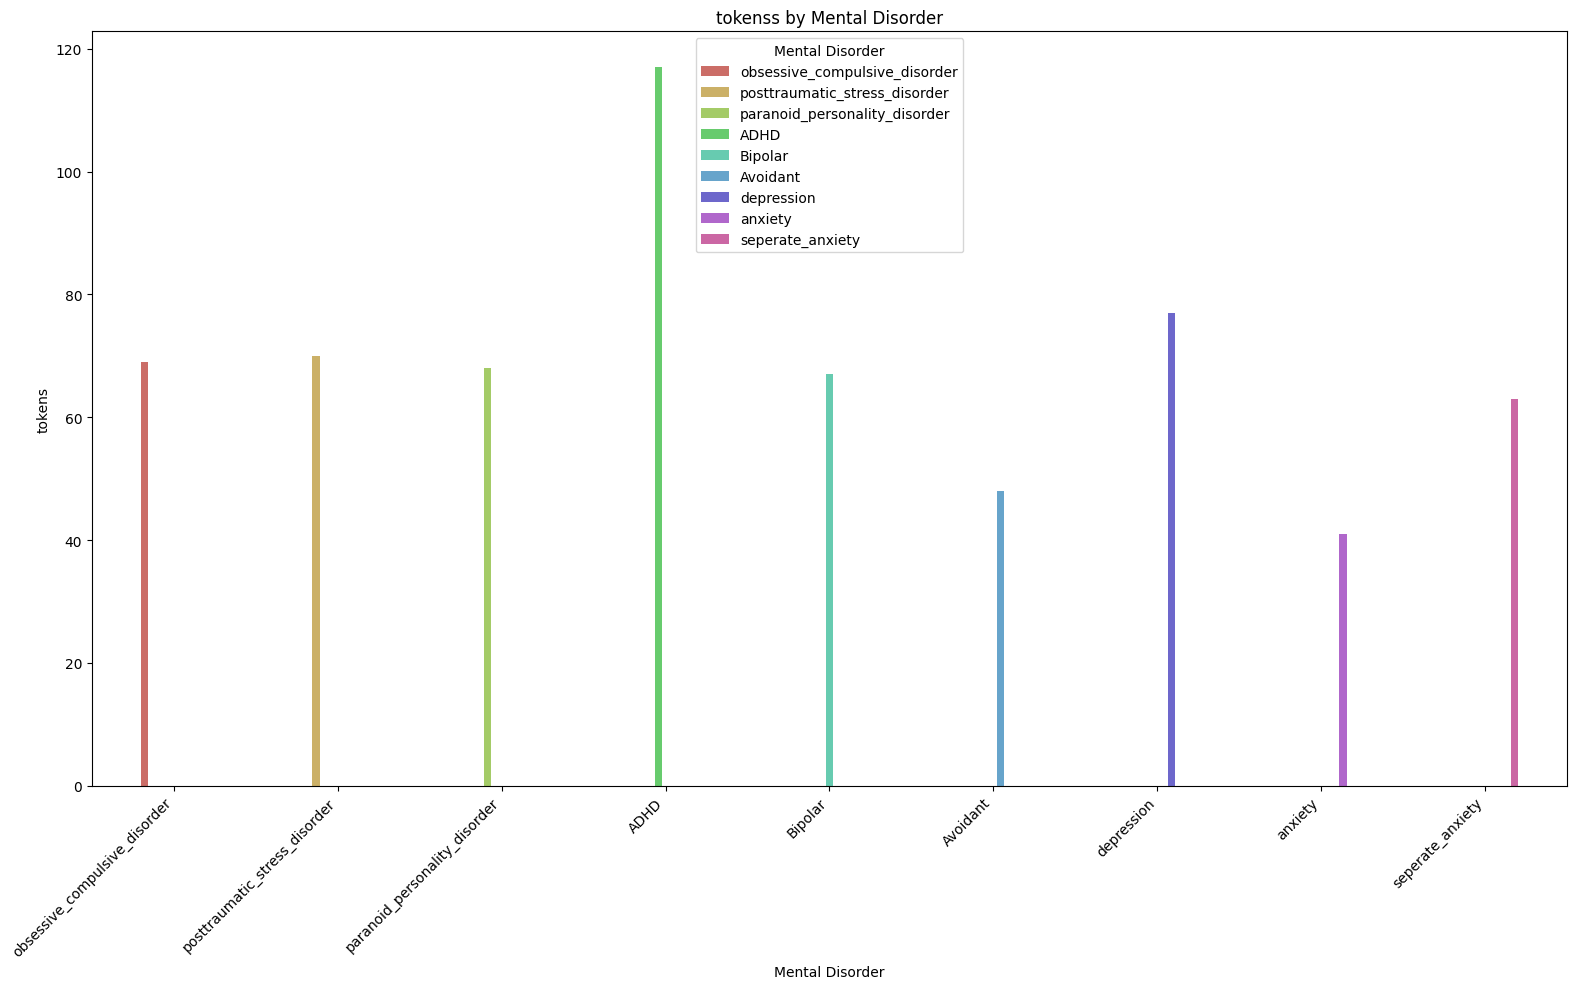

time: 406 ms (started: 2024-04-04 12:29:04 +09:00)


In [45]:
'''각 정신질환별 토큰 개수 계산'''
disorder_names = list(filtered_token_disorder.keys())
token_counts = [len(tokens) for tokens in filtered_token_disorder.values()]

# 토큰 개수 데이터프레임
token_counts_df = pd.DataFrame({
    'Mental Disorder': disorder_names,
    'tokens': token_counts
})

# seaborn으로 막대 그래프 시각화
plt.figure(figsize=(16, 10))
sns.barplot(x='Mental Disorder',
            y='tokens',
            data=token_counts_df,
            palette='hls',
            hue='Mental Disorder',
            width=0.4)

plt.title('tokenss by Mental Disorder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [46]:
df = pd.DataFrame({
    'mental_disorder': filtered_token_disorder.keys(),
    'tokens': filtered_token_disorder.values()
})
df

,mental_disorder,tokens
0,obsessive_compulsive_disorder,"[시간, 유발, 예방, 수행, 반응, 설명, 침입, 물질, 손상, 연결, 목표, 관..."
1,posttraumatic_stress_disorder,"[위협, 유발, 반응, 상징, 초과, 상해, 자발, 침입, 구성원, 손상, 물질, ..."
2,paranoid_personality_disorder,"[사용, 위협, 두려움, 불리, 경멸, 우울, 상해, 자신, 모욕, 성인, 근거, ..."
3,ADHD,"[시간, 사용, 집안일, 무단, 안절부절, 마감 기한, 문서, 지불, 계속, 집중력..."
4,Bipolar,"[시간, 계속, 느낌, 질주, 흥분, 가능, 의기양양, 과민, 목표, 보고, 결과,..."
5,Avoidant,"[자제력, 부정, 두려움, 느낌, 조롱, 당황, 방해, 당혹, 상황, 반응, 평가,..."
6,depression,"[피로, 자살, 집중력, 유발, 반응, 우울, 파탄, 손상, 불면증, 수면과다증, ..."
7,anxiety,"[사건, 학교, 안절부절, 불안, 피로, 불만족, 동안, 최소, 느낌, 통제, 유발..."
8,seperate_anxiety,"[사건, 학교, 별거, 지속, 초래, 불안, 두려움, 환각, 신뢰, 우려, 악몽, ..."


time: 17.6 ms (started: 2024-04-04 12:29:04 +09:00)


# ■ 단어사전 증강

In [65]:
# !pip install gensim
# !pip install wget
# !pip install gunzip
# !python -m wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz
# !python -m gzip -d cc.ko.300.bin.gz

time: 1.3 ms (started: 2024-04-04 13:31:35 +09:00)


In [48]:
import pandas as pd
import ast

try:
    if filtered_token_disorder is not None:
        filtered_token_disorder = df
        
except:
    filtered_token_disorder = pd.read_csv("./진단기준_토큰.csv")
    # 열의 모든 데이터를 리스트로 변환
    filtered_token_disorder['tokens'] = filtered_token_disorder['tokens'].apply(ast.literal_eval)

time: 850 µs (started: 2024-04-04 13:01:58 +09:00)


In [49]:
'''사전 훈련된 모델 로드'''
import re
import os
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.fasttext import load_facebook_vectors
from kiwipiepy import Kiwi

kiwi = Kiwi()

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# # 기본 Word2Vec (데이터셋 필요)
# token_arr = [row for row in filtered_token_disorder['tokens']]
# token_arr = sum(token_arr, [])
# word_vectors = Word2Vec(token_arr, vector_size=100, window=5, min_count=1, sg=0).wv

# 사전 훈련된 모델 파일 경로
model_path = 'cc.ko.300.bin'
word_vectors = load_facebook_vectors(model_path)

print()


time: 48.2 s (started: 2024-04-04 13:01:58 +09:00)


In [50]:
'''
유사한 단어 찾기 및 단어사전에 추가
※문제점: 한자가 나오거나 너무 동떨어진 단어 추가 발생 => 한자 정규식 확인 및 유사도 일정 수치 이하 탈락시킴
'''

def is_hanja(word):
    # 한자 범위를 정규 표현식으로 정의
    hanja_range = re.compile(r'[\u4e00-\u9fff]+')
    return hanja_range.search(word) is not None

def augment_dictionary_with_similar_words(model, word_dictionary, top_n=3, similarity_threshold=0.7):
    augmented_dictionary = {}
    new_tokens_added = {}
    token_similar_words_added = {}  # 어떤 토큰에서 어떤 유사한 단어들이 추가되었는지 기록
    
    for disorder, tokens in zip(word_dictionary["mental_disorder"], word_dictionary["tokens"]):
        augmented_tokens = tokens.copy()
        new_tokens_for_disorder = []
        token_similar_words = {}  # 현재 질환에 대해 토큰별 추가된 유사한 단어들

        target_tags = ['NNG', 'NNP', 'NR', 'NP', 'VCN', 'MAG', 'XPN']
        
        for token in tokens:
            try:
                similar_words = model.most_similar(token, topn=top_n)
                similar_words_added = []

                for word, similarity in similar_words:
                    if similarity >= similarity_threshold and not is_hanja(word):
                        analyzed = kiwi.analyze(word)[0][0]  # 첫 번째 분석 결과
                        word_tags = [morph.tag for morph in analyzed]  # 형태소 태그 추출
                        
                        # target_tags에 포함된 태그가 있는지 확인
                        if any(tag in target_tags for tag in word_tags) and word not in augmented_tokens:
                            augmented_tokens.append(word)
                            new_tokens_for_disorder.append(word)
                            similar_words_added.append(word)
                            
                if similar_words_added:
                    token_similar_words[token] = similar_words_added

            except KeyError:
                continue
                
        augmented_dictionary[disorder] = augmented_tokens
        new_tokens_added[disorder] = new_tokens_for_disorder
        token_similar_words_added[disorder] = token_similar_words

    return augmented_dictionary, new_tokens_added, token_similar_words_added

############## 파라미터 수정 
augmented_filtered_token_disorder, new_tokens_added, token_similar_words_added = augment_dictionary_with_similar_words(word_vectors, filtered_token_disorder, top_n=5, similarity_threshold=0.65)

# 어떤 토큰에서 어떤 유사한 단어들이 추가되었는지 출력
for disorder, tokens_info in token_similar_words_added.items():
    print(f"Disorder: {disorder}")
    for token, similar_words in tokens_info.items():
        print(f"  Token '{token}' added similar words: {similar_words}")

print()


Disorder: obsessive_compulsive_disorder
  Token '예방' added similar words: ['예방과']
  Token '동안' added similar words: ['내내']
  Token '정신' added similar words: ['못차린', '못차리는']
  Token '단어' added similar words: ['숙어']
  Token '감소' added similar words: ['증가', '증대']
  Token '의학' added similar words: ['댁크레이']
  Token '사회' added similar words: ['정치', '경제']
  Token '기능' added similar words: ['기능과']
  Token '대부분' added similar words: ['대부분의']
  Token '이미지' added similar words: ['이미지의', '보기한국']
Disorder: posttraumatic_stress_disorder
  Token '상해' added similar words: ['북경']
  Token '해리' added similar words: ['터틀도브']
  Token '기억' added similar words: ['상실증']
  Token '의학' added similar words: ['댁크레이']
  Token '성폭력' added similar words: ['성폭력과', '성폭력의']
  Token '사회' added similar words: ['정치', '경제']
  Token '기능' added similar words: ['기능과']
  Token '기간' added similar words: ['동안']
  Token '내부' added similar words: ['입구4']
  Token '변화' added similar words: ['변화와']
Disorder: paranoid_personality_disor

In [51]:
df = pd.DataFrame({
    'mental_disorder': augmented_filtered_token_disorder.keys(),
    'tokens': augmented_filtered_token_disorder.values()
})
df
df.to_csv('진단기준_토큰(유사도증강).csv', encoding='utf-8', index = False)

time: 31.4 ms (started: 2024-04-04 13:03:31 +09:00)


# ■ 진단기준 labeling

In [54]:
train = pd.read_csv('../data/train/train_df.csv')

time: 513 ms (started: 2024-04-04 13:14:39 +09:00)


In [55]:
train.head(2)

,profile_persona_id,computer,emotion_id,talk-id,HS01,SS01,HS02,SS02,HS03,SS03,age_id,gender_id,situation01_id,situation02_id,age,gender,situation01,situation02,emotion
0,Pro_05349,C01,E18,Pro_05349_00053,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN,A02,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는
1,Pro_05349,C01,E18,Pro_05349_00049,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN,A02,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는


time: 9.85 ms (started: 2024-04-04 13:14:44 +09:00)


In [56]:
# 대화내용을 합치기 위해 결측치를 공백으로 변환
train.fillna('', inplace=True)

time: 57.7 ms (started: 2024-04-04 13:14:46 +09:00)


In [57]:
# 인덱스별 텍스트의 빈도수 비교를 위해 3번의 대화 내용을 합쳐서 HS에 저장
train['HS'] = train['HS01'] + train['HS02'] + train['HS03']

time: 26.5 ms (started: 2024-04-04 13:14:47 +09:00)


In [58]:
# 대화와 진단기준별 단어 빈도수를 점수로 계산해서 가장 높은 진단기준으로 labeling
def label_disorder(text, token_disorder):
    tokens = kiwi.tokenize(text)
    words = [token.form for token in tokens if token.tag in target_tags]
    word_cnt = Counter(words)

    disorder_score = {disorder : 0 for disorder in token_disorder}
    
    for word, cnt in word_cnt.items():
        for disorder, keyword in token_disorder.items():
            if word in keyword:
                disorder_score[disorder] += cnt
    
    max_disorder = max(disorder_score, key=disorder_score.get)

    return max_disorder

time: 500 µs (started: 2024-04-04 13:14:48 +09:00)


In [59]:
train['label'] = train['HS'].progress_apply(lambda x : label_disorder(x, token_disorder))

100%|██████████| 51628/51628 [01:53<00:00, 452.91it/s]

time: 1min 54s (started: 2024-04-04 13:14:49 +09:00)


In [60]:
train.head()

,profile_persona_id,computer,emotion_id,talk-id,HS01,SS01,HS02,SS02,HS03,SS03,...,gender_id,situation01_id,situation02_id,age,gender,situation01,situation02,emotion,HS,label
0,Pro_05349,C01,E18,Pro_05349_00053,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,,,...,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.그냥 내가 해결하는 게 나아. 남들한테...,paranoid_personality_disorder
1,Pro_05349,C01,E18,Pro_05349_00049,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,,,...,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....,obsessive_compulsive_disorder
2,Pro_05349,C01,E18,Pro_05349_00077,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,,,...,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,obsessive_compulsive_disorder
3,Pro_05349,C01,E18,Pro_05349_00064,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,,,...,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,ADHD
4,Pro_05349,C01,E18,Pro_05349_00039,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,,,...,G02,S06,D02,청년,여성,"진로, 취업, 직장",만성질환 무,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.상사인 나에게 먼...,Bipolar


time: 21.6 ms (started: 2024-04-04 13:30:03 +09:00)


In [61]:
train['label'].value_counts()

label
ADHD                             19192
obsessive_compulsive_disorder     9590
posttraumatic_stress_disorder     6527
Bipolar                           6148
paranoid_personality_disorder     5487
seperate_anxiety                  2135
Avoidant                          1041
anxiety                            766
depression                         742
Name: count, dtype: int64

time: 11.2 ms (started: 2024-04-04 13:30:04 +09:00)


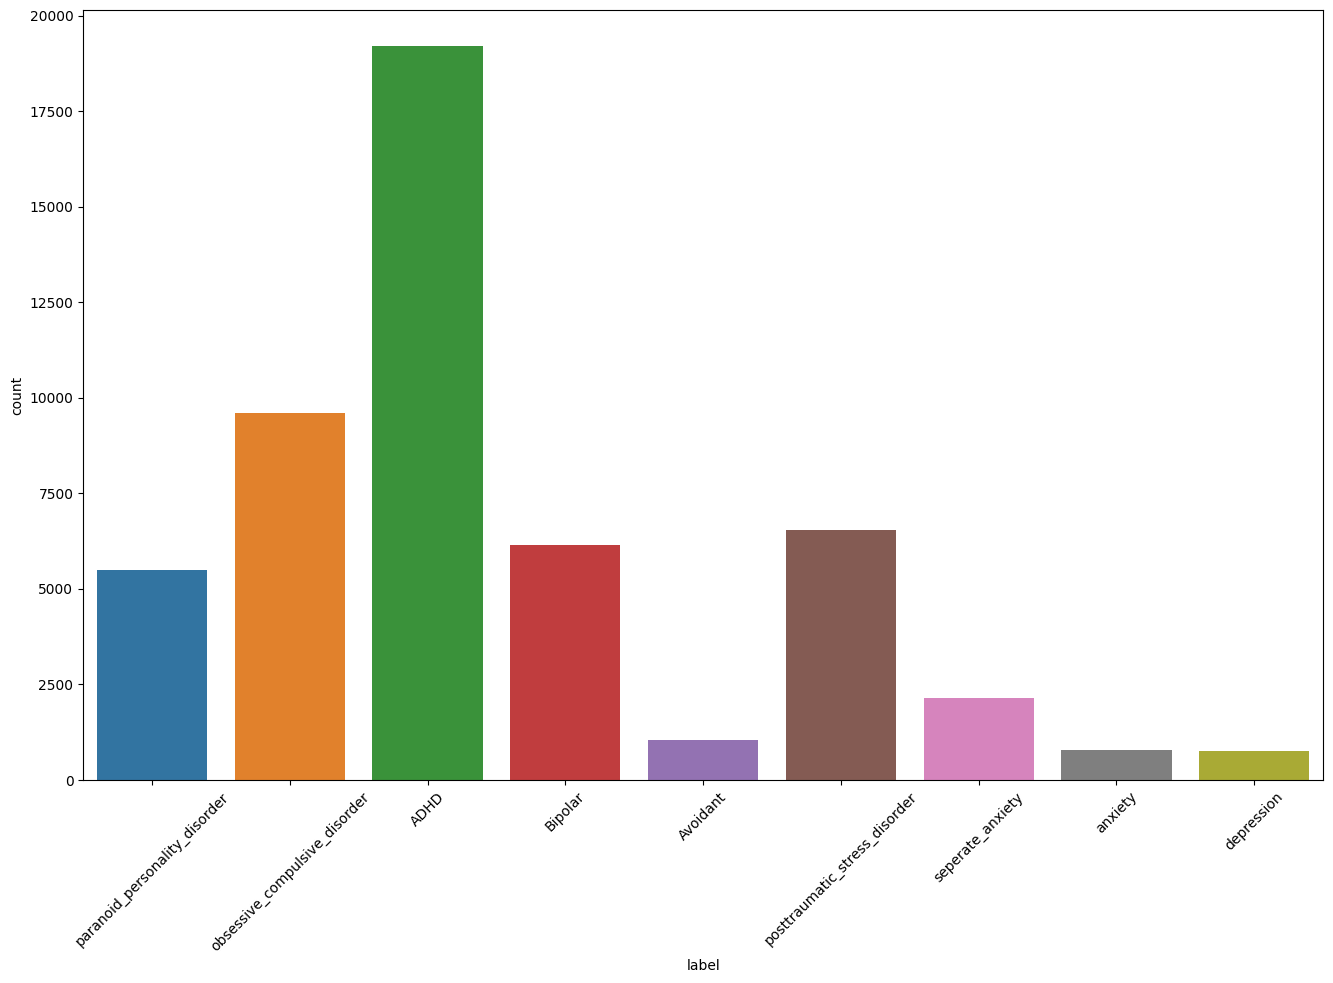

time: 156 ms (started: 2024-04-04 13:30:35 +09:00)


In [64]:
plt.figure(figsize=(16, 10))
sns.countplot(x='label', data=train)
plt.xticks(rotation=45)
plt.show()